# Analisis de telecom proyecto hackaton

# **Decisión sobre el conjunto de datos**

Se ha determinado utilizar el dataset disponible en Kaggle sobre churn en telecomunicaciones, accesible a través del siguiente enlace:

🔗 **[Dataset de telecomunicaciones - Kaggle (cell2cell)](https://www.kaggle.com/datasets/jpacse/datasets-for-churn-telecom?resource=download&select=cell2celltrain.csv)**

## **Dataset principal**
Se trabajará principalmente con el archivo **`cell2celltrain.csv`**, disponible también en:
🔗 **[cell2celltrain.csv (repositorio del proyecto)](https://github.com/Kevincancino26/Versionado-de-Data-Science-telecom-cell2cell-hackaton/blob/main/cell2celltrain.csv)**

Este dataset fue seleccionado porque contiene datos más relevantes para el análisis de correlación y el entrenamiento de modelos de machine learning requeridos en el proyecto.

---

## **📋 Notas importantes**

### **Acceso al dataset**
> 💡 **Nota:** Debido a que varios miembros del equipo han tenido problemas para descargar el dataset, pueden:
> 1. Hacer clic directamente en el nombre del archivo (`cell2celltrain.csv`) para descargarlo, o
> 2. Acceder al enlace de Kaggle y descargarlo directamente desde la fuente original.

### **Metodología de trabajo**
> ⚠️ **IMPORTANTE:** Este es el primer versionado del proyecto. Se recomienda trabajar en una copia local de este archivo, ya sea en equipos personales o en entornos de Google Colab independientes.

**Objetivo de este enfoque:**
- Comparar diferentes técnicas de limpieza de datos
- Evaluar diversos modelos de machine learning
- Analizar distintas formas de programación y abordaje
- Consolidar un código más limpio y estructurado para presentar al equipo de backend

### **Control de versiones**
> 🔄 **Propuesta de flujo de trabajo:**
> "Utilizaremos GitHub para construir un historial de modificaciones puntuales. Solo se integrarán al repositorio principal aquellas líneas de código que superen nuestro filtro de calidad grupal. Mientras tanto, realizaré el versionado inicial en mi repositorio personal hasta que se establezca el repositorio oficial del proyecto."


#Bibliotecas importadas o intaladas

In [166]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lectura de dataset

<font color='skyblue'>Nota interna (no incluir en versionado final):
Para agilizar la lectura de archivos CSV en el futuro, compartimos una función utilitaria que detecta automáticamente la codificación (encoding) del archivo. Esto permite evitar errores comunes relacionados con caracteres especiales o formatos de codificación inesperados.</font>

In [167]:
# Funcion de lectura de archivo CSV

def leer(file_path, encodings=None, separadores=None):
    if encodings is None:
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
    if separadores is None:
        separadores = [',', ';', '\t', '|']

    #combinaciones de iteracion donde se ejecutan las diferentes convinaciones de los caracteres de la listas
    combinaciones=list(itertools.product(encodings,separadores))


    #Con diferentes encodings y separadores
    for encoding in encodings:
        for sep in separadores:
            try:
                df=pd.read_csv(file_path,
                encoding=encoding,
                sep=sep,
                on_bad_lines='skip',
                engine='python')# motor de lectura de csv en python para archivos complejos en lugar de usar el por defecto de C

                 # Verificamos que se leyó
                if not df.empty and len(df.columns) > 1:# si no esta vacio y hay mas de una columna, deribado que por el encodign los datos pueden aparecer en un solo registro
                    print(f" Se leyo con exito el dataset con el encoding: {encoding} y uso como separador: '{sep}'")
                    return df
            except UnicodeDecodeError:
                continue
            try:
                df = pd.read_csv(file_path, on_bad_lines='skip')#en caso de que no contenfa un separador y un encodign
                print("Leido con exito sin encoding")
                return df
            except UnicodeDecodeError:
                print('No sse puede leer el archivo con ninguna combinacion ')

In [168]:
print('')
df2=leer('/content/cell2celltrain.csv')
print('')
df2


 Se leyo con exito el dataset con el encoding: utf-8 y uso como separador: ','



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


# Información del df2

In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# **Limpieza de datos**

Se trabajará de la siguiente manera:

## **Proceso de limpieza**

1. **Validación inicial de valores nulos**  
   Se realizará una revisión rápida de los valores nulos en todas las columnas del dataset.

2. **Normalización de nombres de columnas**  
   Se traducirán y estandarizarán los nombres de las columnas a formato *camelCase* para mayor consistencia.

3. **Búsqueda exhaustiva de valores faltantes**  
   Se efectuará una exploración más amplia de valores nulos en todo el dataset, concentrándose específicamente en las variables relacionadas con el contrato para poder iniciar el entrenamiento del modelo.

4. **Limpieza de datos inconsistentes**  
   Se eliminarán o tratarán los valores nulos y negativos que aparezcan en las columnas del contrato. Finalmente, se imprimirá la tabla para realizar una última inspección de los valores restantes.

## **Consideración técnica**

Para evitar problemas de sobreescritura con `df2` (la base de datos original), se creará una copia con el nombre **`df_clean`**.

### Columnas con conteo de nulos

In [170]:
df2.isnull().sum().sort_values(ascending=False)

,0
AgeHH1,909
AgeHH2,909
PercChangeRevenues,367
PercChangeMinutes,367
DirectorAssistedCalls,156
TotalRecurringCharge,156
RoamingCalls,156
OverageMinutes,156
MonthlyRevenue,156
MonthlyMinutes,156


# **Traducción de nombres de columnas**

Por requerimiento del equipo de backend, se procede a traducir los nombres de las columnas al español, manteniendo el formato **camelCase** para garantizar compatibilidad y un mejor uso en las siguientes etapas del proyecto.

---

## **📋 Proceso de traducción**

### **Objetivo:**
- Estandarizar los nombres de variables en español
- Mantener consistencia con el formato camelCase (ej: `nombreColumna`)
- Facilitar la interpretación y manipulación de datos para todo el equipo

### **Ejemplo de transformación:**
```python
# Antes (inglés):
customer_id, monthly_charges, total_charges, churn_value

# Después (español):
id_cliente, cargos_mensuales, cargos_totales, estado_baja


In [171]:
nombres_traducidos = {
    'CustomerID': 'id_cliente',
    'Churn': 'abandono',
    'MonthlyRevenue': 'ingresos_mensuales',
    'MonthlyMinutes': 'minutos_mensuales',
    'TotalRecurringCharge': 'cargo_recurrente',
    'DirectorAssistedCalls': 'llamadas_asistidas_directorio',
    'OverageMinutes': 'minutos_excedentes',
    'RoamingCalls': 'llamadas_roaming',
    'PercChangeMinutes': 'cambio_porcentaje_minutos',
    'PercChangeRevenues': 'cambio_porcentaje_ingresos',
    'DroppedCalls': 'llamadas_caidas',
    'BlockedCalls': 'llamadas_bloqueadas',
    'UnansweredCalls': 'llamadas_no_contestadas',
    'CustomerCareCalls': 'llamadas_atencion_cliente',
    'ThreewayCalls': 'llamadas_tres_vias',
    'ReceivedCalls': 'llamadas_recibidas',
    'OutboundCalls': 'llamadas_salientes',
    'InboundCalls': 'llamadas_entrantes',
    'PeakCallsInOut': 'llamadas_pico_ent_sal',
    'OffPeakCallsInOut': 'llamadas_fuera_pico_ent_sal',
    'DroppedBlockedCalls': 'llamadas_caidas_bloqueadas',
    'CallForwardingCalls': 'llamadas_desvío',
    'CallWaitingCalls': 'llamadas_espera',
    'MonthsInService': 'meses_en_servicio',
    'UniqueSubs': 'suscriptores_unicos',
    'ActiveSubs': 'suscriptores_activos',
    'ServiceArea': 'area_servicio',
    'Handsets': 'equipos',
    'HandsetModels': 'modelos_equipo',
    'CurrentEquipmentDays': 'dias_equipo_actual',
    'AgeHH1': 'edad_hogar_1',
    'AgeHH2': 'edad_hogar_2',
    'ChildrenInHH': 'hijos_en_hogar',
    'HandsetRefurbished': 'equipo_reacondicionado',
    'HandsetWebCapable': 'equipo_capacidad_web',
    'TruckOwner': 'propietario_camion',
    'RVOwner': 'propietario_rv',
    'Homeownership': 'propiedad_vivienda',
    'BuysViaMailOrder': 'compra_correo',
    'RespondsToMailOffers': 'responde_ofertas_correo',
    'OptOutMailings': 'excluir_publicidad_correo',
    'NonUSTravel': 'viajes_fuera_eeuu',
    'OwnsComputer': 'posee_computadora',
    'HasCreditCard': 'tiene_tarjeta_credito',
    'RetentionCalls': 'llamadas_retencion',
    'RetentionOffersAccepted': 'ofertas_retencion_aceptadas',
    'NewCellphoneUser': 'usuario_celular_nuevo',
    'NotNewCellphoneUser': 'usuario_celular_antiguo',
    'ReferralsMadeBySubscriber': 'referidos_por_suscriptor',
    'IncomeGroup': 'grupo_ingresos',
    'OwnsMotorcycle': 'posee_motocicleta',
    'AdjustmentsToCreditRating': 'ajustes_calificacion_crediticia',
    'HandsetPrice': 'precio_equipo',
    'MadeCallToRetentionTeam': 'llamada_a_retencion',
    'CreditRating': 'calificacion_crediticia',
    'PrizmCode': 'codigo_prizm',
    'Occupation': 'ocupacion',
    'MaritalStatus': 'estado_civil'
}

# Aplicar el cambio de nombre
df2.rename(columns=nombres_traducidos, inplace=True)

# Verificar los nuevos nombres
df2.head(10)

,id_cliente,abandono,ingresos_mensuales,minutos_mensuales,cargo_recurrente,llamadas_asistidas_directorio,minutos_excedentes,llamadas_roaming,cambio_porcentaje_minutos,cambio_porcentaje_ingresos,...,referidos_por_suscriptor,grupo_ingresos,posee_motocicleta,ajustes_calificacion_crediticia,precio_equipo,llamada_a_retencion,calificacion_crediticia,codigo_prizm,ocupacion,estado_civil
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


## **Detección de valores nulos**

Se procede a identificar y cuantificar los valores nulos presentes en el dataset, con el objetivo de determinar qué columnas requieren tratamiento posterior.

---

## **🔍 Proceso de detección**

### **1. Consulta inicial rápida**
Primero se realiza un análisis general en formato de columnas para obtener una visión global de los datos faltantes.

### **2. Corrección de los valores**

### **3. Visualización de resultados**

In [172]:
df2.isnull().sum().sort_values(ascending=False)

,0
edad_hogar_1,909
edad_hogar_2,909
cambio_porcentaje_ingresos,367
cambio_porcentaje_minutos,367
llamadas_asistidas_directorio,156
cargo_recurrente,156
llamadas_roaming,156
minutos_excedentes,156
ingresos_mensuales,156
minutos_mensuales,156


Consulta exhaustiva de valores nulos
Se procede a realizar un análisis detallado en formato de tabla para identificar específicamente qué valores son nulos y en qué cantidad se presentan en cada columna.

In [173]:
# 1. Se crea el resumen base
nulos = df2.copy() #Creo una copia
resumen = pd.DataFrame({
    'Tipo': nulos.dtypes,
    'NaN': nulos.isna().sum(),
    'Unknown': (nulos == 'Unknown').sum(),
    'Known': (nulos == 'Known').sum(),
})

# Se define cuáles son las columnas de conteo para no afectar a la columna 'Tipo'
cols_conteo = ['NaN', 'Unknown', 'Known']

# 2. Se identifica columnas que tienen al menos un valor > 0 en las métricas
columnas_con_datos = resumen[(resumen[cols_conteo] > 0).any(axis=1)].copy()

# 3. Limpieza visual: Solo afectamos a las columnas de conteo
# Filtramos para que los ceros desaparezcan visualmente (se vuelven NaN)
resumen_final_conteos = columnas_con_datos[cols_conteo].where(columnas_con_datos[cols_conteo] > 0)

# 4. Volvemos a unir con la columna 'Tipo' para no perder esa información
resumen_final = pd.concat([columnas_con_datos[['Tipo']], resumen_final_conteos], axis=1)

print("Análisis de valores faltantes y especiales (solo columnas afectadas):")
print(resumen_final.fillna('-'))

Análisis de valores faltantes y especiales (solo columnas afectadas):
                                  Tipo    NaN  Unknown    Known
ingresos_mensuales             float64  156.0        -        -
minutos_mensuales              float64  156.0        -        -
cargo_recurrente               float64  156.0        -        -
llamadas_asistidas_directorio  float64  156.0        -        -
minutos_excedentes             float64  156.0        -        -
llamadas_roaming               float64  156.0        -        -
cambio_porcentaje_minutos      float64  367.0        -        -
cambio_porcentaje_ingresos     float64  367.0        -        -
area_servicio                   object   24.0        -        -
equipos                        float64    1.0        -        -
modelos_equipo                 float64    1.0        -        -
dias_equipo_actual             float64    1.0        -        -
edad_hogar_1                   float64  909.0        -        -
edad_hogar_2                   flo

# **Contrato Preliminar de Calidad de Datos**

## **Propósito**
Se establece un contrato de calidad basado en el modelo original de Aaron, ampliado con variables adicionales necesarias para el desarrollo del modelo predictivo y el proceso de limpieza de datos.

---

## **Especificaciones por Campo**

### **1. Ingresos Mensuales**
- **Tipo de dato:** Decimal (float)
- **Valores nulos:** 5 registros

### **2. Cargo Recurrente Total**
- **Tipo de dato:** Decimal (float)
- **Valores nulos:** 11 registros

### **3. Calificación Crediticia**
- **Tipo de dato:** Entero (int)
- **Valores nulos:** 0 registros

### **4. Llamadas Caídas**
- **Tipo de dato:** Decimal (float)
- **Valores nulos:** 0 registros

### **5. Meses en Servicio**
- **Tipo de dato:** Entero (int)
- **Valores nulos:** 6 registros

### **6. Días con Equipo Actual**
- **Tipo de dato:** Decimal (float)
- **Valores nulos:** 1 registros

---

## **Objetivos del Contrato**

### **A. Limpieza de Datos**
- Identificar y tratar los valores faltantes según las cantidades especificadas
- Eliminar o corregir valores negativos en caso de tener
- Verificar que los datos cumplan con los rangos y formatos establecidos

### **B. Preparación para Modelo Predictivo**
- Incluir variables relevantes para la predicción de churn
- Garantizar la calidad e integridad de las variables predictoras
- Preparar los datos para su uso en algoritmos de machine learning

### Se imprime la tabla con las colummnas del contrato

In [174]:
df2[['id_cliente', 'ingresos_mensuales', 'cargo_recurrente', 'calificacion_crediticia', 'llamadas_caidas', 'meses_en_servicio', 'dias_equipo_actual']].head(10)

,id_cliente,ingresos_mensuales,cargo_recurrente,calificacion_crediticia,llamadas_caidas,meses_en_servicio,dias_equipo_actual
0,3000002,24.00,22.0,1-Highest,0.7,61,361.0
1,3000010,16.99,17.0,4-Medium,0.3,58,1504.0
2,3000014,38.00,38.0,3-Good,0.0,60,1812.0
3,3000022,82.28,75.0,4-Medium,52.0,59,458.0
4,3000026,17.14,17.0,1-Highest,0.0,53,852.0
5,3000030,38.05,52.0,3-Good,9.0,53,231.0
6,3000038,31.66,30.0,1-Highest,0.0,57,601.0
7,3000042,62.13,66.0,1-Highest,0.0,59,464.0
8,3000046,35.30,35.0,1-Highest,0.0,53,544.0
9,3000050,81.00,75.0,3-Good,0.0,55,388.0


## Limpieza de los datos del contrato

### Trabajando los valores nulos y negativos de *ingresos_mensuales*


In [175]:
# Ver cuántos nulos y negativos hay
nulos = df2['ingresos_mensuales'].isna().sum()
negativos = (df2['ingresos_mensuales'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores negativos: {negativos}")

Valores nulos: 156
Valores negativos: 3


In [176]:
# Aseguramos que trabajamos en la copia
df_clean = df2.copy()

# 1. Primero quitamos negativos (para que no afecten los cálculos)
df_clean.loc[df_clean['ingresos_mensuales'] < 0, 'ingresos_mensuales'] = 0

# 2. Calculamos la mediana de los datos que sí tenemos
valor_para_imputar = df_clean['ingresos_mensuales'].median()
# Aquí valor_para_imputar será 48.46 aprox.

# 3. Llenamos los nulos con esa mediana (48.46)
df_clean['ingresos_mensuales'] = df_clean['ingresos_mensuales'].fillna(valor_para_imputar)

# 4. Redondeamos al final
df_clean['ingresos_mensuales'] = df_clean['ingresos_mensuales'].round(2)

print(f"Valor usado para llenar nulos: {valor_para_imputar:.2f}")
print(f"Nuevo promedio de la base completa: {df_clean['ingresos_mensuales'].mean():.2f}")

Valor usado para llenar nulos: 48.46
Nuevo promedio de la base completa: 58.80


*Solo es para comprobar que tanto cambio*

In [177]:
# Estadísticas de la columna original (con nulos y negativos)
stats_original = df2['ingresos_mensuales'].describe()

# Estadísticas de la columna limpia (con mediana 48.46 y sin negativos)
stats_limpia = df_clean['ingresos_mensuales'].describe()

comparacion = pd.DataFrame({
    'Original': stats_original,
    'Limpia (Mediana)': stats_limpia
})

print(comparacion)

           Original  Limpia (Mediana)
count  50891.000000      51047.000000
mean      58.834492         58.803073
std       44.507336         44.442570
min       -6.170000          0.000000
25%       33.610000         33.660000
50%       48.460000         48.460000
75%       71.065000         70.960000
max     1223.380000       1223.380000


In [178]:
# Calculamos ambas métricas sobre la columna que ya no tiene negativos
promedio = df_clean['ingresos_mensuales'].mean()
mediana = df_clean['ingresos_mensuales'].median()

print(f"Promedio (Mean): {promedio:.2f}")
print(f"Mediana (Median): {mediana:.2f}")

# Calculamos la diferencia porcentual
diferencia = abs(promedio - mediana) / mediana * 100
print(f"La diferencia es del: {diferencia:.2f}%")

Promedio (Mean): 58.80
Mediana (Median): 48.46
La diferencia es del: 21.34%


In [179]:
# Ver cuántos nulos y negativos hay
nulos = df_clean['ingresos_mensuales'].isna().sum()
negativos = (df_clean['ingresos_mensuales'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores negativos: {negativos}")

Valores nulos: 0
Valores negativos: 0


### Trabajando los valores nulos y negativos de *cargo_recurrente_total*


In [180]:
# Ver cuántos nulos y negativos hay
nulos = df2['cambio_porcentaje_minutos'].isna().sum()
negativos = (df2['cambio_porcentaje_minutos'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores negativos: {negativos}")

Valores nulos: 367
Valores negativos: 26816


In [181]:
# 1. Crear copia y limpiar negativos
df_clean['cargo_recurrente'] = df_clean['cargo_recurrente'].apply(lambda x: x if x >= 0 else 0)

# 2. Comparar métricas
mean_cargo = df_clean['cargo_recurrente'].mean()
median_cargo = df_clean['cargo_recurrente'].median()

print(f"Promedio Cargo: {mean_cargo:.2f}")
print(f"Mediana Cargo: {median_cargo:.2f}")

Promedio Cargo: 46.69
Mediana Cargo: 45.00


In [182]:
# Aplicando la recomendación
valor_imputar_cargo = df_clean['cargo_recurrente'].median()
df_clean['cargo_recurrente'] = df_clean['cargo_recurrente'].fillna(valor_imputar_cargo).round(2)

print(f"Valor usado para llenar nulos: {median_cargo:.2f}")
print(f"Nuevo promedio de la base completa: {df_clean['cargo_recurrente'].mean():.2f}")

Valor usado para llenar nulos: 45.00
Nuevo promedio de la base completa: 46.69


In [183]:
# Calculamos ambas métricas sobre la columna que ya no tiene negativos
promedio = df_clean['cargo_recurrente'].mean()
mediana = df_clean['cargo_recurrente'].median()

print(f"Promedio (Mean): {promedio:.2f}")
print(f"Mediana (Median): {mediana:.2f}")

# Calculamos la diferencia porcentual
diferencia = abs(promedio - mediana) / mediana * 100
print(f"La diferencia es del: {diferencia:.2f}%")

Promedio (Mean): 46.69
Mediana (Median): 45.00
La diferencia es del: 3.75%


In [184]:
# Ver cuántos nulos y negativos hay
nulos = df_clean['cargo_recurrente'].isna().sum()
negativos = (df_clean['cargo_recurrente'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores negativos: {negativos}")

Valores nulos: 0
Valores negativos: 0


### Trabajando los valores nulos y negativos de *dias_equipo_actual*

In [185]:
# Ver cuántos nulos y negativos hay
nulos = df_clean['dias_equipo_actual'].isna().sum()
negativos = (df_clean['dias_equipo_actual'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores negativos: {negativos}")

Valores nulos: 1
Valores negativos: 76


In [186]:
# 1. Corregir los 76 negativos a 0
df_clean['dias_equipo_actual'] = df_clean['dias_equipo_actual'].apply(lambda x: x if x >= 0 else 0)

# 2. Calcular la mediana para el valor nulo
mediana_dias = df_clean['dias_equipo_actual'].median()

# 3. Llenar el único NaN
df_clean['dias_equipo_actual'] = df_clean['dias_equipo_actual'].fillna(mediana_dias)

# 4. Asegurar que sean números enteros
# Los días suelen ser enteros, si prefieres puedes convertirlos:
df_clean['dias_equipo_actual'] = df_clean['dias_equipo_actual'].astype(int)

print(f"Valor usado para llenar nulos: {mediana_dias:.2f}")
print(f"Nuevo promedio de la base completa: {df_clean['dias_equipo_actual'].mean():.2f}")

Valor usado para llenar nulos: 329.00
Nuevo promedio de la base completa: 380.54


In [187]:
# Calculamos ambas métricas sobre la columna que ya no tiene negativos
promedio = df_clean['dias_equipo_actual'].mean()
mediana = df_clean['dias_equipo_actual'].median()

print(f"Promedio (Mean): {promedio:.2f}")
print(f"Mediana (Median): {mediana:.2f}")

# Calculamos la diferencia porcentual
diferencia = abs(promedio - mediana) / mediana * 100
print(f"La diferencia es del: {diferencia:.2f}%")

Promedio (Mean): 380.54
Mediana (Median): 329.00
La diferencia es del: 15.67%


In [188]:
nulos = df_clean['dias_equipo_actual'].isna().sum()
negativos = (df_clean['dias_equipo_actual'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores negativos: {negativos}")

Valores nulos: 0
Valores negativos: 0


### Se convierte yes y no a binario.

In [189]:
df_clean['abandono'] = df_clean['abandono'].map({'Yes': 1, 'No': 0})

### Se pasa calificación crediticia a números.

De acuerdo a su traducción, se les asigna un valor.

In [190]:
# Mapeo lógico: 7 es la mejor calificación (Highest) y 1 la peor (Lowest)
mapping_credito = {
    '1-Highest': 7,
    '2-High': 6,
    '3-Good': 5,
    '4-Medium': 4,
    '5-Low': 3,
    '6-VeryLow': 2,
    '7-Lowest': 1
}

df_clean['calificacion_crediticia'] = df_clean['calificacion_crediticia'].map(mapping_credito)

### Se confirma como queda los valores de la tabla

In [191]:
df_clean[['calificacion_crediticia',
    'ingresos_mensuales',
    'cargo_recurrente',
    'llamadas_caidas',
    'meses_en_servicio',
    'dias_equipo_actual']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   calificacion_crediticia  51047 non-null  int64  
 1   ingresos_mensuales       51047 non-null  float64
 2   cargo_recurrente         51047 non-null  float64
 3   llamadas_caidas          51047 non-null  float64
 4   meses_en_servicio        51047 non-null  int64  
 5   dias_equipo_actual       51047 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 2.3 MB


##Se realiza una prueba en los ajustes del contrato

In [192]:
# Definimos las columnas numéricas donde queremos controlar los excesos
columnas_con_outliers = ['ingresos_mensuales', 'cargo_recurrente', 'llamadas_caidas']

print("--- Aplicando Capping (Percentil 99) ---")

for col in columnas_con_outliers:
    # 1. Calculamos el valor del percentil 99
    limite_superior = df_clean[col].quantile(0.99).round(2)

    # 2. Aplicamos el recorte (clip)
    # Los valores mayores al limite_superior se igualan a ese límite
    df_clean[col] = df_clean[col].clip(upper=limite_superior)

    print(f"Columna '{col}': Cualquier valor mayor a {limite_superior:.2f} se ajustó a este límite.")

print("\n¡Limpieza mejorada lista!")

--- Aplicando Capping (Percentil 99) ---
Columna 'ingresos_mensuales': Cualquier valor mayor a 225.67 se ajustó a este límite.
Columna 'cargo_recurrente': Cualquier valor mayor a 120.00 se ajustó a este límite.
Columna 'llamadas_caidas': Cualquier valor mayor a 42.30 se ajustó a este límite.

¡Limpieza mejorada lista!


In [193]:
df2['ingresos_mensuales'].max()

1223.38

In [194]:
df_clean['ingresos_mensuales'].max()

225.67

## Verificación del Contrato con Datos Limpios
Resultados Post-Limpieza
Se realiza la validación del contrato de calidad después del proceso de limpieza de datos, confirmando que todas las variables cumplen con las especificaciones establecidas.

In [195]:
df_clean[['id_cliente', 'abandono', 'ingresos_mensuales', 'cargo_recurrente', 'calificacion_crediticia', 'llamadas_caidas', 'meses_en_servicio', 'dias_equipo_actual']].tail(10)


,id_cliente,abandono,ingresos_mensuales,cargo_recurrente,calificacion_crediticia,llamadas_caidas,meses_en_servicio,dias_equipo_actual
51037,3399906,0,31.92,17.0,5,0.7,30,883
51038,3399910,0,48.46,0.0,7,3.7,28,282
51039,3399922,0,50.00,50.0,2,3.7,30,882
51040,3399942,0,71.99,70.0,7,14.3,30,882
51041,3399946,1,117.49,30.0,3,4.0,30,489
51042,3399958,1,48.46,0.0,7,9.3,29,526
51043,3399974,0,95.17,85.0,5,16.7,29,464
51044,3399978,1,48.46,0.0,3,42.3,25,378
51045,3399990,0,48.46,0.0,3,0.0,31,433
51046,3399994,0,48.46,0.0,3,18.7,25,75


In [196]:
df_clean['abandono'].unique()

array([1, 0])

# **Correlación lineal con respecto a las variables dependientes hacia la variable respuesta (CHURN)**

## **Análisis de variables predictoras**

En esta fase, luego de la limpieza de datos, nos enfocaremos en el análisis de correlación para el modelado de machine learning. El objetivo es identificar qué variables presentan mayor relación con la variable de salida (churn).

---

## **Metodología propuesta**

### **1. Identificación de variables relevantes**
Aislar las variables que presenten mayor correlación con la variable objetivo. Para esto se pueden utilizar:

- **Análisis estadístico** (coeficiente de correlación)
- **Visualizaciones gráficas** (heatmaps, scatter plots)
- **Herramientas de IA** (selección automática de características)

Estas técnicas permitirán evaluar, mediante criterios cuantitativos y cualitativos, qué variables tienen mayor relación antes de implementar el modelo matemático de regresión.

### **2. Desarrollo del modelo de regresión para clasificación**
Elaborar un modelo de regresión que permita:
- Clasificar correctamente los casos de churn
- Detectar las variables que realmente afectan a la variable respuesta
- Validar la significancia estadística de cada predictor

### **3. Preparación para modelado de ML**
Aislar las variables más relevantes en un dataset independiente, el cual será utilizado específicamente para los entrenamientos posteriores de machine learning.

---

## **Flujo de trabajo**

1. **Análisis exploratorio** → Identificar correlaciones iniciales
2. **Selección de características** → Filtrar variables más influyentes  
3. **Creación de subset** → Dataset enfocado en predictores clave
4. **Entrenamiento de modelos** → Utilizar variables seleccionadas para ML

---

**Nota:** Este enfoque permite optimizar los modelos al eliminar ruido y redundancia en los datos, mejorando tanto el rendimiento como la interpretabilidad de los resultados.

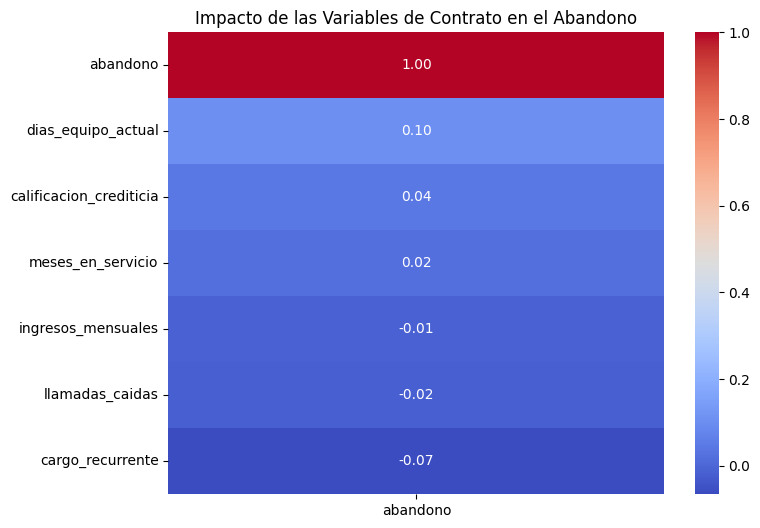

In [197]:
# Lista de tus variables de contrato (incluyendo el target)
vars_contrato = [
    'calificacion_crediticia', 'ingresos_mensuales', 'cargo_recurrente',
    'llamadas_caidas', 'meses_en_servicio', 'dias_equipo_actual', 'abandono'
]

# Calculamos la matriz de correlación solo para estas columnas
corr_contrato = df_clean[vars_contrato].corr()

# Visualización enfocada en la relación con 'abandono'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_contrato[['abandono']].sort_values(by='abandono', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Impacto de las Variables de Contrato en el Abandono")
plt.show()

## Se divide los datos en dos

In [213]:
# 1. Definimos exactamente qué columnas queremos usar (solo las numéricas del contrato)
variables_contrato = [
    'calificacion_crediticia',
    'ingresos_mensuales',
    'cargo_recurrente',
    'llamadas_caidas',
    'meses_en_servicio',
    'dias_equipo_actual'
]

# 2. Redefinimos X e y asegurándonos de que solo vayan esas columnas
X = df_clean[variables_contrato]
y = df_clean['abandono']

# 3. Volvemos a dividir los datos (esto es rápido)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 4. Ahora sí, entrena el Random Forest sin errores
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

print("¡Ahora sí funcionó! El modelo ya tiene solo números.")
print(f"Registros para entrenamiento: {len(X_train)}")
print(f"Registros para prueba: {len(X_test)}")

¡Ahora sí funcionó! El modelo ya tiene solo números.
Registros para entrenamiento: 40837
Registros para prueba: 10210


In [214]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Calculamos el ratio de desbalance para XGBoost
# Esto le dice al modelo: "Por cada 1 persona que se queda, hay X que se van, ¡préstales atención!"
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

# 2. Random Forest con class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced', # <--- LA MAGIA ESTÁ AQUÍ
    random_state=42
)
rf_model.fit(X_train, y_train)

# 3. XGBoost con scale_pos_weight
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=ratio, # <--- LA MAGIA ESTÁ AQUÍ
    random_state=42
)
xgb_model.fit(X_train, y_train)

print("✅ Modelos re-entrenados con balanceo de clases.")

✅ Modelos re-entrenados con balanceo de clases.


In [216]:
# Re-utilizamos la función que ya teníamos para ver los resultados
resultados_balanceados = [
    obtener_metricas("Random Forest (Balanceado)", rf_model, X_test, y_test),
    obtener_metricas("XGBoost (Balanceado)", xgb_model, X_test, y_test)
]

df_reporte_nuevo = pd.DataFrame(resultados_balanceados)
print(df_reporte_nuevo)

                       Modelo  Exactitud  Precisión  Sensibilidad  F1-Score  \
0  Random Forest (Balanceado)   0.541528   0.352050      0.703263  0.469214   
1        XGBoost (Balanceado)   0.573457   0.364991      0.649218  0.467278   

    AUC-ROC  
0  0.628579  
1  0.634735  


/tmp/ipython-input-4219481953.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancias, palette='magma')


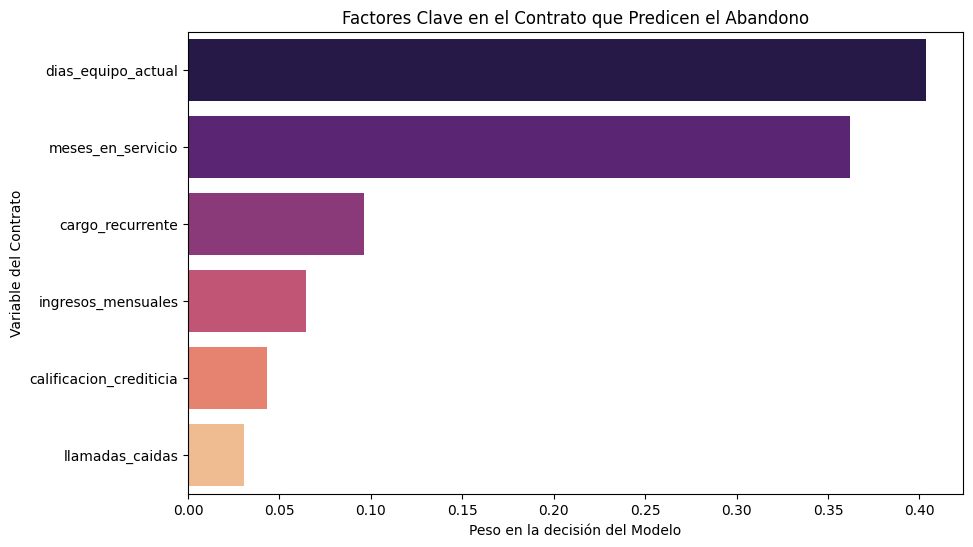

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos la importancia de las variables del Random Forest
importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancias, palette='magma')
plt.title("Factores Clave en el Contrato que Predicen el Abandono")
plt.xlabel("Peso en la decisión del Modelo")
plt.ylabel("Variable del Contrato")
plt.show()

/tmp/ipython-input-1368513547.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancia_rf, palette='viridis')


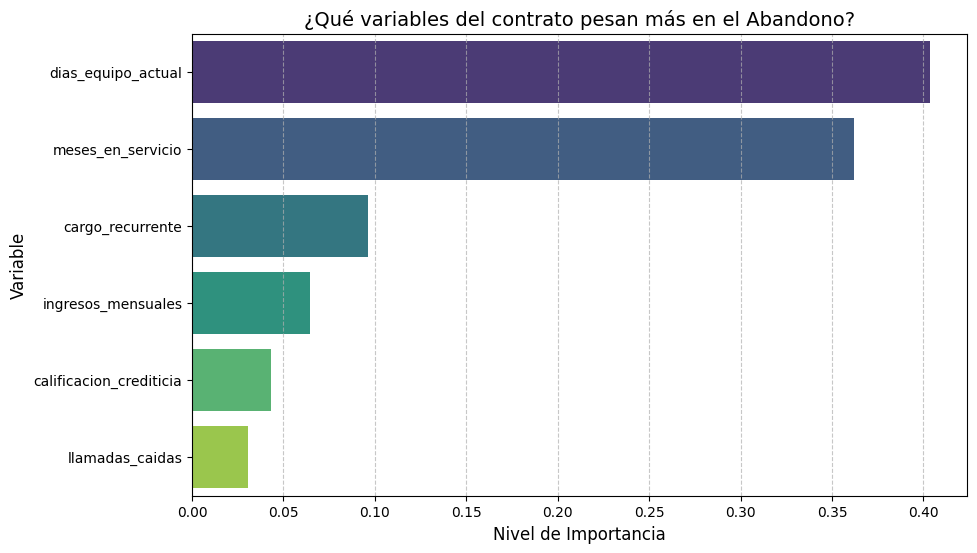

Interpretación rápida:
- dias_equipo_actual: 40.37%
- meses_en_servicio: 36.20%
- cargo_recurrente: 9.60%
- ingresos_mensuales: 6.45%
- calificacion_crediticia: 4.32%
- llamadas_caidas: 3.06%


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos la importancia del Random Forest (que tuvo el mejor Recall)
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_rf, palette='viridis')
plt.title("¿Qué variables del contrato pesan más en el Abandono?", fontsize=14)
plt.xlabel("Nivel de Importancia", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Interpretación rápida:")
for i, row in importancia_rf.iterrows():
    print(f"- {row['Variable']}: {row['Importancia']:.2%}")

<Figure size 800x600 with 0 Axes>

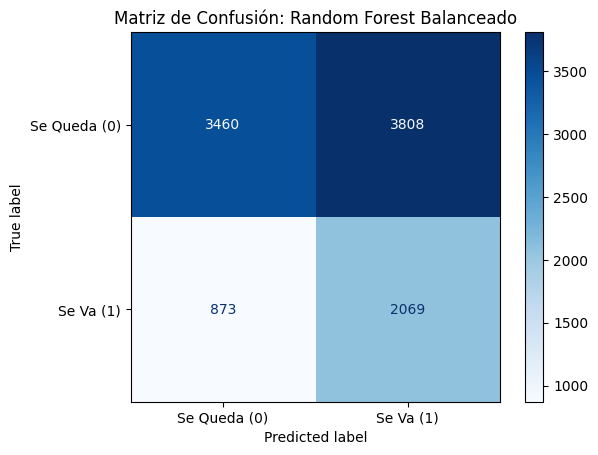

In [222]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtenemos las predicciones
y_pred = rf_model.predict(X_test)

# Creamos la matriz
cm = confusion_matrix(y_test, y_pred)

# La graficamos de forma profesional
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se Queda (0)', 'Se Va (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión: Random Forest Balanceado")
plt.show()

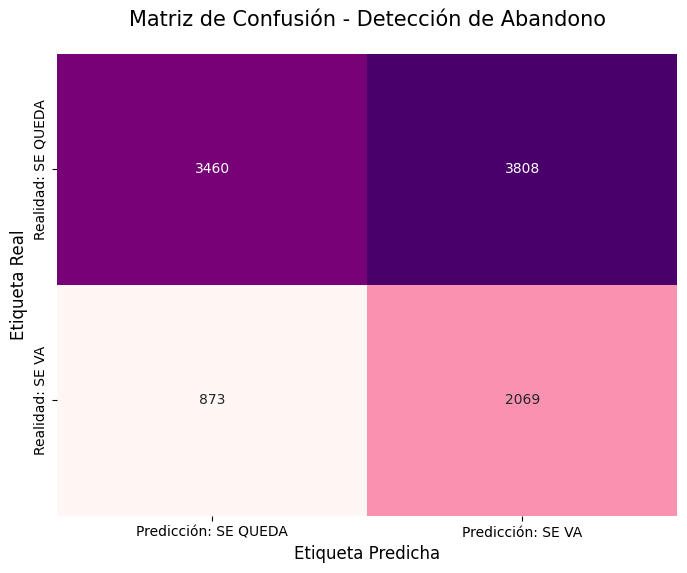

--------------------------------------------------
RESUMEN DE LA MATRIZ (Interpretación):
--------------------------------------------------
✅ CLIENTES RESCATADOS: 2069
   (El modelo dijo que se iban y acertó. ¡Podemos actuar!)
❌ FUGAS SILENCIOSAS: 873
   (Se fueron y el modelo no los detectó. Hay que mejorar aquí.)
⚠️ FALSAS ALARMAS: 3808
   (Gente leal que el modelo marcó como riesgo. Les daremos un premio gratis.)
🏠 CLIENTES LEALES: 3460
   (Están tranquilos y el modelo sabe que no se van.)
--------------------------------------------------


In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Generar la predicción y la matriz
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Extraemos los números de la matriz
# tn = Verdaderos Negativos, fp = Falsos Positivos
# fn = Falsos Negativos, tp = Verdaderos Positivos
tn, fp, fn, tp = cm.ravel()

# 2. Configurar el estilo visual (La imagen)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', cbar=False,
            xticklabels=['Predicción: SE QUEDA', 'Predicción: SE VA'],
            yticklabels=['Realidad: SE QUEDA', 'Realidad: SE VA'])

plt.title('Matriz de Confusión - Detección de Abandono', fontsize=15, pad=20)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.show()

# 3. Imprimir la información en texto (Lo que me pediste)
print("-" * 50)
print("RESUMEN DE LA MATRIZ (Interpretación):")
print("-" * 50)
print(f"✅ CLIENTES RESCATADOS: {tp}")
print(f"   (El modelo dijo que se iban y acertó. ¡Podemos actuar!)")
print(f"❌ FUGAS SILENCIOSAS: {fn}")
print(f"   (Se fueron y el modelo no los detectó. Hay que mejorar aquí.)")
print(f"⚠️ FALSAS ALARMAS: {fp}")
print(f"   (Gente leal que el modelo marcó como riesgo. Les daremos un premio gratis.)")
print(f"🏠 CLIENTES LEALES: {tn}")
print(f"   (Están tranquilos y el modelo sabe que no se van.)")
print("-" * 50)

In [226]:
# Evaluamos el rendimiento en ambos conjuntos
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print("-" * 40)
print(f"Exactitud en Entrenamiento (Train): {train_accuracy:.4f}")
print(f"Exactitud en Prueba (Test):        {test_accuracy:.4f}")
print("-" * 40)

# El Veredicto
diferencia = train_accuracy - test_accuracy

if diferencia > 0.10:
    print("🚩 ALERTA: Hay Sobreentrenamiento (Overfitting).")
    print("El modelo se memorizó los datos. Sugerencia: reduce 'max_depth'.")
elif diferencia < -0.10:
    print("❓ EXTRAÑO: El modelo rinde mejor en Test que en Train (Underfitting).")
else:
    print("✅ TODO BIEN: El modelo es consistente.")
    print("La diferencia es pequeña, lo que significa que generaliza bien.")

----------------------------------------
Exactitud en Entrenamiento (Train): 0.5499
Exactitud en Prueba (Test):        0.5415
----------------------------------------
✅ TODO BIEN: El modelo es consistente.
La diferencia es pequeña, lo que significa que generaliza bien.


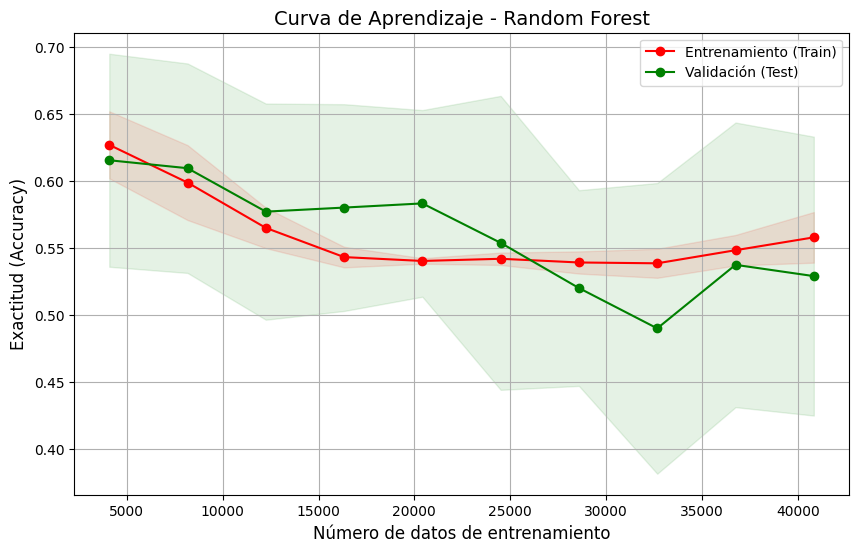

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculamos la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculamos promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Entrenamiento (Train)")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validación (Test)")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Curva de Aprendizaje - Random Forest", fontsize=14)
plt.xlabel("Número de datos de entrenamiento", fontsize=12)
plt.ylabel("Exactitud (Accuracy)", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

# **Modelado Predictivo - Separación de Datos**

## **División del conjunto de datos**

Se procede a dividir el dataset en subconjuntos para entrenamiento y prueba, con el objetivo de evaluar adecuadamente el rendimiento del modelo. Las proporciones recomendadas son:

### **Opciones de división:**
- **70% entrenamiento / 30% prueba** - Para conjuntos de datos grandes
- **80% entrenamiento / 20% prueba** - Para conjuntos de datos más pequeños
- **Separación triple** - Entrenamiento, validación y prueba (ej: 60/20/20) cuando se requiera ajuste de hiperparámetros

La elección dependerá del tamaño total del dataset y de la necesidad de tener conjuntos de validación para optimización de modelos.

---

## **Creación de Modelos Predictivos**

### **Modelos a implementar:**

#### **1. Modelos de clasificación básicos**
- **K-Vecinos más Cercanos (KNN)**
- **Regresión Logística**

#### **2. Modelos basados en árboles**
- **Árbol de Decisión**
- **Bosque Aleatorio (Random Forest)**

### **Consideraciones técnicas importantes:**

> **Nota:** Algunos modelos requieren normalización o estandarización previa de los datos. Para una evaluación completa, se recomienda:
> - Probar cada modelo **con y sin normalización**
> - Comparar el rendimiento en ambas condiciones
> - Seleccionar la configuración óptima según las características específicas de las variables

Esta comparación permitirá determinar si la normalización mejora significativamente la capacidad predictiva para cada algoritmo.

---

## **Flujo de implementación**

1. **Preprocesamiento** → Normalización condicional según el modelo
2. **División de datos** → Separación en conjuntos de entrenamiento y prueba
3. **Entrenamiento** → Aplicación de múltiples algoritmos
4. **Evaluación comparativa** → Análisis de rendimiento entre modelos y configuraciones
5. **Selección final** → Elección del mejor modelo según métricas de evaluación


# **Evaluación de Modelos Predictivos**

## **Métricas de Evaluación**

Se evaluará el desempeño de los modelos utilizando las siguientes métricas (por especificar según el contexto del proyecto):

### **Métricas de clasificación recomendadas:**
1. **Exactitud (Accuracy)** - Proporción de predicciones correctas
2. **Precisión (Precision)** - Capacidad de no clasificar falsos positivos  
3. **Sensibilidad (Recall)** - Capacidad de encontrar todos los positivos
4. **Puntuación F1 (F1-Score)** - Media armónica entre precisión y sensibilidad
5. **Curva ROC y AUC** - Capacidad discriminativa del modelo
6. **Matriz de confusión** - Desglose detallado de aciertos y errores

---

## **Preguntas clave de evaluación**

### **1. Desempeño comparativo**
**¿Cuál modelo tuvo el mejor desempeño general?**
- Análisis basado en múltiples métricas
- Evaluación de consistencia entre conjuntos de entrenamiento y prueba
- Consideración del equilibrio entre complejidad y rendimiento

### **2. Diagnóstico de problemas de ajuste**
**¿Algún modelo presentó overfitting o underfitting?**
- **Overfitting:** Alto rendimiento en entrenamiento, bajo en prueba
- **Underfitting:** Bajo rendimiento en ambos conjuntos
- **Indicadores a monitorear:**
  - Brecha significativa entre accuracy de entrenamiento y prueba
  - Curvas de aprendizaje divergentes
  - Pérdida (loss) que no converge adecuadamente

### **3. Preguntas adicionales para análisis profundo:**
- ¿Qué variables son las más influyentes en cada modelo?
- ¿Cómo se comportan los modelos con datos desbalanceados?
- ¿Existe un trade-off óptimo entre precisión y sensibilidad?
- ¿Los modelos son interpretables y accionables para el negocio?

---

## **Proceso de evaluación**

1. **Cálculo de métricas** para cada modelo en entrenamiento y prueba
2. **Comparación visual** mediante gráficos y tablas comparativas
3. **Análisis de overfitting/underfitting** mediante curvas de aprendizaje
4. **Validación cruzada** para estimación más robusta del rendimiento
5. **Interpretación de resultados** en contexto del problema de negocio

---

## **Reporte de evaluación sugerido**

| Modelo | Exactitud (Test) | Precisión | Sensibilidad | F1-Score | AUC | ¿Overfitting? |
|--------|------------------|-----------|--------------|----------|-----|---------------|
| Regresión Logística | | | | | | |
| KNN | | | | | | |
| Árbol de Decisión | | | | | | |
| Random Forest | | | | | | |

---


# Serializacion del modelo

Serializar el modelo en el archivo adecuado para enviar al equipo de back end este archivo puede ser (json,pkl,etc)
esto es de acuerdo al modleo champion obtenido de la evaluacion asi como el requisito de compatibilidad para la api